#### 겨울철 체감 온도 예측 머신러닝 모델

In [5]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import joblib

In [6]:
# csv 파일 읽어오기
data = pd.read_csv('/Users/hyunjulee/project/SensibleTemp/data/csv/winter.csv')
data.head()

,Date,Temperature,WindSpeed,SensibleTemp
0,2000-01-01,1.8,10.1,-1.2
1,2000-01-02,-0.3,20.2,-5.7
2,2000-01-03,-4.6,13.0,-9.6
3,2000-01-04,-4.4,7.2,-7.6
4,2000-01-05,0.0,13.3,-4.1


In [7]:
# 일자는 학습에 필요없으니까 drop
df = data.drop('Date', axis=1)
df.head()

,Temperature,WindSpeed,SensibleTemp
0,1.8,10.1,-1.2
1,-0.3,20.2,-5.7
2,-4.6,13.0,-9.6
3,-4.4,7.2,-7.6
4,0.0,13.3,-4.1


In [4]:
# 최저 체감 온도, 최고 체감 온도
print('겨울철 최고 체감 온도 : ', df['SensibleTemp'].max())
print('겨울철 최저 체감 온도 : ', df['SensibleTemp'].min())

겨울철 최고 체감 온도 :  9.8
겨울철 최저 체감 온도 :  -27.7


In [8]:
# target / features 분리
target = 'SensibleTemp'
features = df.drop(target, axis=1).columns

# X / y 분리
X = df[features]
y = df[target]

# train / val / test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# 확인
print('train set:', X_train.shape, y_train.shape)
print('val set:', X_val.shape, y_val.shape)
print('test set:', X_test.shape, y_test.shape)

train set: (2560, 2) (2560,)
val set: (640, 2) (640,)
test set: (801, 2) (801,)


In [9]:
# 다중 선형 회귀 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 다중 선형 회귀 r2, mae
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)
model_r2 = r2_score(y_val, pred_val)
model_mae = mean_absolute_error(y_val, pred_val)

# 다중 선형 회귀 r2, mae
print('train r2 score : ', r2_score(y_train,pred_train))
print('train MAE score : ', mean_absolute_error(y_train,pred_train))
print('')
print('val r2 score : ', model_r2)
print('val MAE score : ', model_mae)

train r2 score :  0.9985973528950514
train MAE score :  0.19643970600502825

val r2 score :  0.9986731636510925
val MAE score :  0.19142073734046092


In [10]:
# 일반화성능 확인
pred_test = model.predict(X_test)

print('test r2 score : ', r2_score(y_test, pred_test))
print('test mae score : ', mean_absolute_error(y_test, pred_test))

test r2 score :  0.9987301214765899
test mae score :  0.20210264286065907


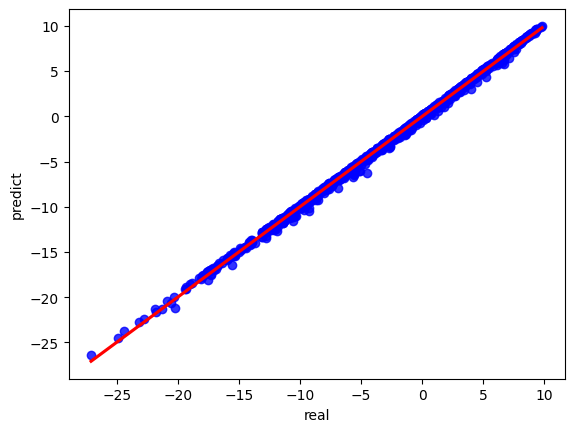

In [11]:
# 시각화
result  = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(pred_test)], axis = 1)
result.columns = ['real', 'predict']
sns.regplot(x = 'real', y = 'predict', data = result, 
            line_kws={"color": "red"}, scatter_kws={"color": "blue"});

In [12]:
# 모델 피클링
joblib.dump(model, '/Users/hyunjulee/project/SensibleTemp/data/pkl/w_multiple_ols.pkl')


['/Users/hyunjulee/project/SensibleTemp/data/pkl/w_multiple_ols.pkl']

In [13]:
# 잘 불러와 지는지 확인
load_model = joblib.load('/Users/hyunjulee/project/SensibleTemp/data/pkl/w_multiple_ols.pkl')
load_model

LinearRegression()